# NIFTY Exploratory data analysis in Python.

## Introduction

**What data are we exploring today ?**

![alt text](Columns1.png "List of columns")
![alt text](Columns2.png "List of columns")



![alt text](SampleData.png "Sample Data")


## 1. Importing the required libraries

Below are the libraries that are used in order to perform Exploratory data analysis in this tutorial.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Our data is saved in csv format. Now lets import that into pandas as a dataframe and confirm that the data is same as the sample data above(taken from excel)

In [97]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head(5)               

,Date,vixChange,netChange,prevChangeNF,prevChangeBNF,NFOIChange,BNFOIChange,basisChange,opengap1,closegap1,highgap1,lowgap1
0,2013-12-30,2.86,8.0,0.4,0.4,4.15,6.95,-12.0,0.2,-0.6,0.3,-0.8
1,2014-01-01,3.04,10.0,0.3,0.1,-2.51,-0.58,-23.0,0.5,0.4,0.6,0.2
2,2014-01-02,6.23,6.0,0.1,0.2,0.34,4.58,-11.0,-0.1,-1.6,0.8,-1.8
3,2014-01-03,-4.11,-32.0,-1.6,-2.2,-2.50,-1.20,-31.0,-0.5,-0.1,0.1,-0.9
4,2014-01-06,3.97,-5.0,-0.1,0.2,-8.82,4.86,6.0,-0.2,-0.4,-0.0,-0.8


In [98]:
df.tail(5)                        # To display the botton 5 rows

,Date,vixChange,netChange,prevChangeNF,prevChangeBNF,NFOIChange,BNFOIChange,basisChange,opengap1,closegap1,highgap1,lowgap1
1238,2018-12-21,11.58,-11.0,-0.1,-0.1,-1.03,-2.12,6.0,-0.2,-1.9,0.0,-2.0
1239,2018-12-24,-1.52,-43.0,-1.9,-1.5,-3.35,-4.06,-11.0,-0.1,-0.8,0.2,-1.0
1240,2018-12-26,1.08,-24.0,-0.8,-0.6,-26.12,-7.52,4.0,-0.4,0.6,0.7,-1.4
1241,2018-12-27,0.96,19.0,0.6,0.9,-25.39,-24.56,0.0,1.0,0.6,1.2,0.5
1242,2018-12-28,-4.99,6.0,0.6,-0.0,25.65,51.26,11.0,0.4,0.9,1.3,0.4



As we can see the data is proper(from 30th Dec 2013 to 28th Dec 2018)
---



## 3. Checking the types of data

Before running any analysis, lets first make sure data types saved are correct in the pandas dataframe

In [99]:
df.dtypes

Date              object
vixChange        float64
netChange        float64
prevChangeNF     float64
prevChangeBNF    float64
NFOIChange       float64
BNFOIChange      float64
basisChange      float64
opengap1         float64
closegap1        float64
highgap1         float64
lowgap1          float64
dtype: object



---



## 4. Dropping irrelevant columns

Since right now, we want to look at only at next day, we drop the highgap1(next day high), lowgap1(next day low) and opengap1(next day open) columns

In [100]:
df = df.drop(['opengap1', 'highgap1', 'lowgap1'], axis=1)
df.head(5)

,Date,vixChange,netChange,prevChangeNF,prevChangeBNF,NFOIChange,BNFOIChange,basisChange,closegap1
0,2013-12-30,2.86,8.0,0.4,0.4,4.15,6.95,-12.0,-0.6
1,2014-01-01,3.04,10.0,0.3,0.1,-2.51,-0.58,-23.0,0.4
2,2014-01-02,6.23,6.0,0.1,0.2,0.34,4.58,-11.0,-1.6
3,2014-01-03,-4.11,-32.0,-1.6,-2.2,-2.50,-1.20,-31.0,-0.1
4,2014-01-06,3.97,-5.0,-0.1,0.2,-8.82,4.86,6.0,-0.4


We have lesser and more manageable number of columns now. Only closegap1 is our output column. Rest are input data columns.

---



## 5. Renaming the columns

For the sake of our tutorial, let us rename some columns to have more descriptive names

In [101]:
df = df.rename(columns={"netChange": "AdvDecline", "prevChangeNF": "NIFTY Price Change", "prevChangeBNF": "BANKNIFTY Price Change","closegap1":"Next Day Change" })
df.head(5)

,Date,vixChange,AdvDecline,NIFTY Price Change,BANKNIFTY Price Change,NFOIChange,BNFOIChange,basisChange,Next Day Change
0,2013-12-30,2.86,8.0,0.4,0.4,4.15,6.95,-12.0,-0.6
1,2014-01-01,3.04,10.0,0.3,0.1,-2.51,-0.58,-23.0,0.4
2,2014-01-02,6.23,6.0,0.1,0.2,0.34,4.58,-11.0,-1.6
3,2014-01-03,-4.11,-32.0,-1.6,-2.2,-2.50,-1.20,-31.0,-0.1
4,2014-01-06,3.97,-5.0,-0.1,0.2,-8.82,4.86,6.0,-0.4


## 6. Dropping the missing or null values.

Let us make sure there are no missing values

In [102]:
print(df.count)

<bound method DataFrame.count of             Date  vixChange  AdvDecline  NIFTY Price Change  \
0     2013-12-30       2.86         8.0                 0.4   
1     2014-01-01       3.04        10.0                 0.3   
2     2014-01-02       6.23         6.0                 0.1   
3     2014-01-03      -4.11       -32.0                -1.6   
4     2014-01-06       3.97        -5.0                -0.1   
...          ...        ...         ...                 ...   
1238  2018-12-21      11.58       -11.0                -0.1   
1239  2018-12-24      -1.52       -43.0                -1.9   
1240  2018-12-26       1.08       -24.0                -0.8   
1241  2018-12-27       0.96        19.0                 0.6   
1242  2018-12-28      -4.99         6.0                 0.6   

      BANKNIFTY Price Change  NFOIChange  BNFOIChange  basisChange  \
0                        0.4        4.15         6.95        -12.0   
1                        0.1       -2.51        -0.58        -23.0   


In [103]:
print(df.isnull().sum())

Date                      0
vixChange                 0
AdvDecline                0
NIFTY Price Change        0
BANKNIFTY Price Change    0
NFOIChange                0
BNFOIChange               0
basisChange               0
Next Day Change           0
dtype: int64


In [104]:
#df = df.dropna()    # Dropping the missing values.
#df.count()

If we uncomment code above, we can remove the null rows

In [105]:
#print(df.isnull().sum())   # After dropping the values

## 7. Detecting Outliers

Always a good idea to check outliers in the data visually as outliers can affect final analysis disproportionately
For this, we will use box plot which use the concept of IQR(Inter quartile range). 
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

The box covers 25th to 75th percentile of the data. Difference between 25th and 7th percentile is IQR. The two vertical lines are 1.5times IQR away from 25th and 75th percentile. Plotted points are outliers.

![alt text](boxplot.png "Box Plot Basic")


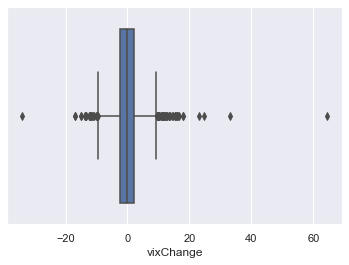

In [106]:
sns.boxplot(x=df['vixChange'])

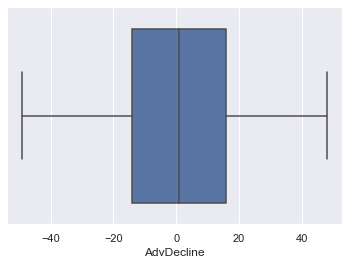

In [107]:
sns.boxplot(x=df['AdvDecline'])

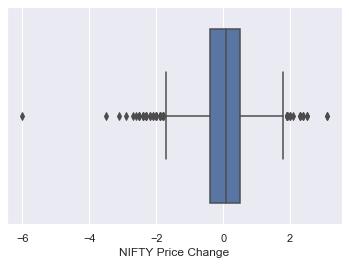

In [108]:
sns.boxplot(x=df['NIFTY Price Change'])

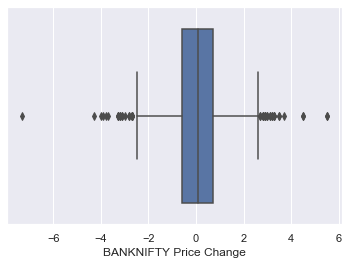

In [109]:
sns.boxplot(x=df['BANKNIFTY Price Change'])

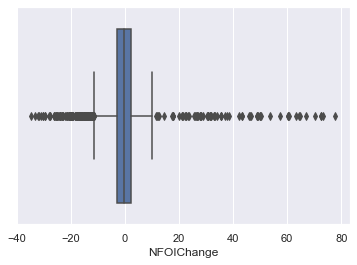

In [110]:
sns.boxplot(x=df['NFOIChange'])

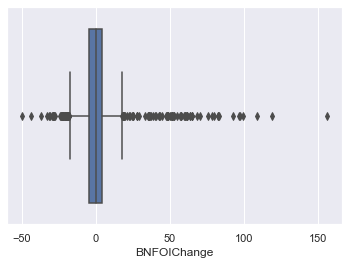

In [111]:
sns.boxplot(x=df['BNFOIChange'])

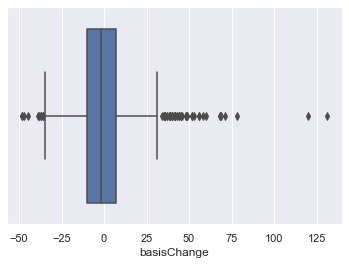

In [112]:
sns.boxplot(x=df['basisChange'])

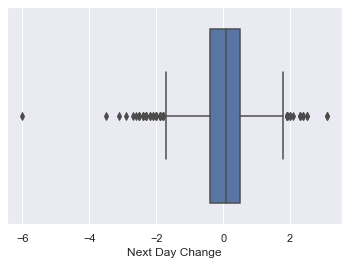

In [113]:
sns.boxplot(x=df['Next Day Change'])

In [114]:
Q1 = df['NIFTY Price Change'].quantile(0.25)
Q3 = df['NIFTY Price Change'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.9


### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map, we can see at one glance that **Vix change has the strong impact on our output variable("One Day Change")**

,vixChange,AdvDecline,NIFTY Price Change,BANKNIFTY Price Change,NFOIChange,BNFOIChange,basisChange,Next Day Change
vixChange,1.000000,0.069701,0.074280,0.050529,0.017034,0.028477,-0.002079,-0.559466
AdvDecline,0.069701,1.000000,0.901374,0.774151,0.100542,0.052254,0.055731,0.065724
NIFTY Price Change,0.074280,0.901374,1.000000,0.869002,0.107594,0.062272,0.075326,0.061490
BANKNIFTY Price Change,0.050529,0.774151,0.869002,1.000000,0.089311,0.049321,0.071499,0.068945
NFOIChange,0.017034,0.100542,0.107594,0.089311,1.000000,0.779631,0.387754,0.036691
BNFOIChange,0.028477,0.052254,0.062272,0.049321,0.779631,1.000000,0.404798,0.027513
basisChange,-0.002079,0.055731,0.075326,0.071499,0.387754,0.404798,1.000000,-0.012025
Next Day Change,-0.559466,0.065724,0.061490,0.068945,0.036691,0.027513,-0.012025,1.000000


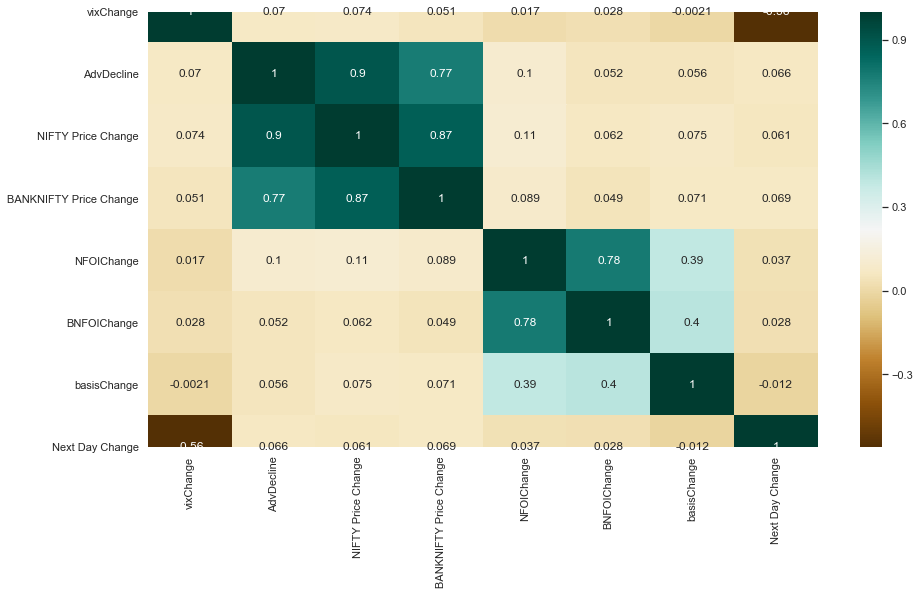

In [123]:
plt.figure(figsize=(15,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between VIX Change and Next Day Change and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

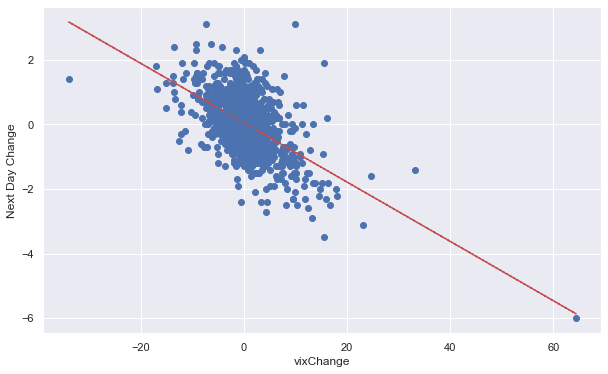

Correlation -0.56


In [116]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['vixChange'], df['Next Day Change'])
ax.set_xlabel('vixChange')
ax.set_ylabel('Next Day Change')
z = np.polyfit(df['vixChange'], df['Next Day Change'], 1)
p = np.poly1d(z)
ax.plot(df['vixChange'],p(df['vixChange']),"r--")
plt.show()
print("Correlation",round(df['vixChange'].corr(df['Next Day Change']),2))

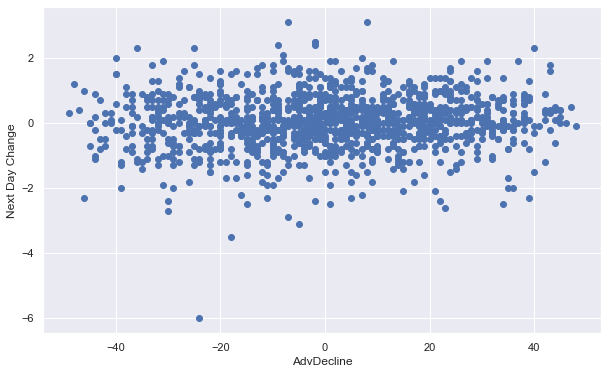

Correlation 0.07


In [117]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['AdvDecline'], df['Next Day Change'])
ax.set_xlabel('AdvDecline')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['AdvDecline'].corr(df['Next Day Change']),2))

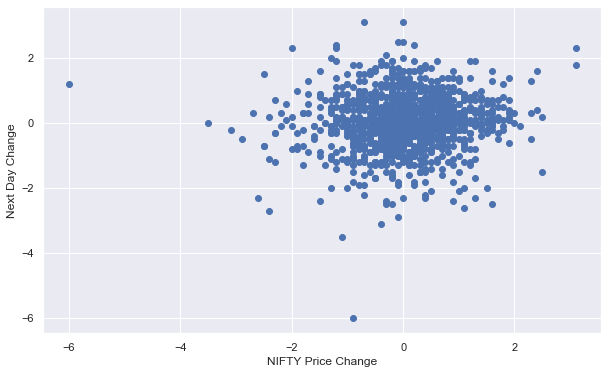

Correlation 0.06


In [118]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['NIFTY Price Change'], df['Next Day Change'])
ax.set_xlabel('NIFTY Price Change')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['NIFTY Price Change'].corr(df['Next Day Change']),2))

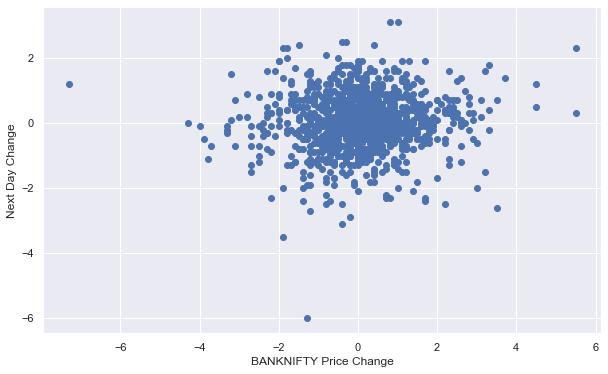

Correlation 0.07


In [119]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['BANKNIFTY Price Change'], df['Next Day Change'])
ax.set_xlabel('BANKNIFTY Price Change')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['BANKNIFTY Price Change'].corr(df['Next Day Change']),2))

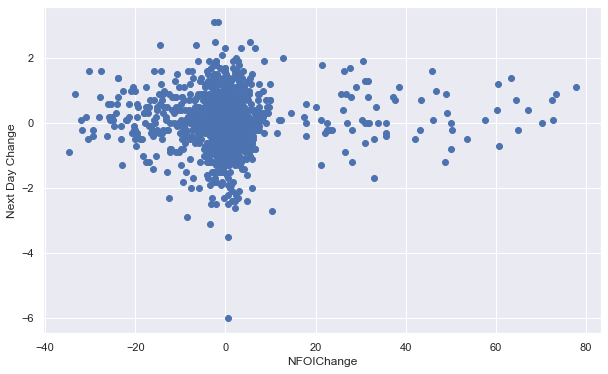

Correlation 0.04


In [120]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['NFOIChange'], df['Next Day Change'])
ax.set_xlabel('NFOIChange')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['NFOIChange'].corr(df['Next Day Change']),2))

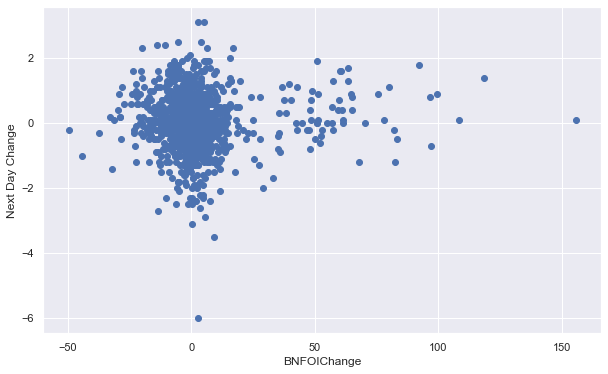

Correlation 0.03


In [121]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['BNFOIChange'], df['Next Day Change'])
ax.set_xlabel('BNFOIChange')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['BNFOIChange'].corr(df['Next Day Change']),2))

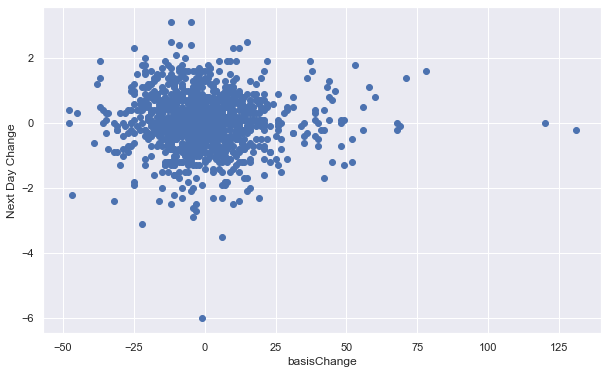

Correlation -0.01


In [122]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['basisChange'], df['Next Day Change'])
ax.set_xlabel('basisChange')
ax.set_ylabel('Next Day Change')
plt.show()
print("Correlation",round(df['basisChange'].corr(df['Next Day Change']),2))

**As we can see, VIX Change is by far the most important variable in predicting next day close vis-a-vis current day close**
This analysis can be repeated for changes to next day Open, High and Low also relative to current day close and for days further out(3 days in the future etc)

